### Approximate Nearest Neighbors Approach
  
Most Collaborative Filtering Method suffer from slow training and huge complexity.  
Hence, Spark MLlib provides a MinHash Local Sensitive Hashing method to transfrom feature, in this way, we can easily scale things up.  

Due to time limitation and some unknown error, I can only run my scripts in Pycharm and failed to use pyspark Context  in Jupyter notebook. Please refer to **sparkLSH.py** in the same repo.

#### Data

The data csv we use is almost the same as the one we use in the **Factorization Machine** part.  
However, due to large size of dataset on a single machine, please run the **preproessing.py** in the same repo for data cleaning and csv file generation. There is a slightly different with respect to data sampling between these two method.

#### Benchmark Method by Surprise 
  
We use the scikit-surprise package for the benchmark Method.  
We also implement to ALS model using Spark. Please refer to **sparkALS** in the same repo.

In [8]:
import time 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import surprise
from surprise.prediction_algorithms.knns import KNNBaseline,KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.model_selection import cross_validate
from surprise.model_selection.search import GridSearchCV
from surprise import Dataset
from surprise import Reader
from sklearn.model_selection import KFold
import time as tm
import scipy.stats as spst
import scipy.sparse as spsp
import itertools
from surprise import accuracy
from surprise.model_selection import train_test_split
%matplotlib inline
df=pd.read_csv('../users_items_100.csv')
df['playtime_forever'] = round(np.log(df['playtime_forever']+1),2)

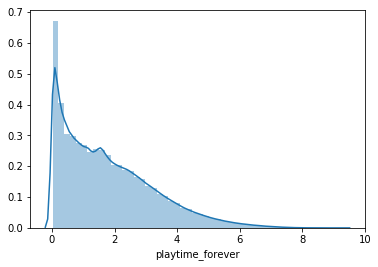

In [3]:
sns.distplot(df['playtime_forever'])

In [4]:
reader = Reader(sep=',', skip_lines=1, rating_scale=(0, 10))

In [5]:
data=Dataset.load_from_df(df,reader=reader)

In [6]:
trainset, testset = train_test_split(data,test_size = 0.9999)
start = time.time()
algo1 = SVD()
algo1.fit(trainset)
predictions = algo1.test(testset)
end = time.time()
time_taken = str(int(end - start)) + " sec"
print('Time: {}'.format(time_taken))
accuracy.rmse(predictions)

Time: 43 sec
RMSE: 1.4289


1.4288544676706416

In [9]:
start = time.time()
algo2 = KNNBasic(k=20)
algo2.fit(trainset)
predictions = algo2.test(testset)
end = time.time()
time_taken = str(int(end - start)) + " sec"
print('Time: {}'.format(time_taken))
accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
Time: 50 sec
RMSE: 1.4673


1.4672831148464538

#### ANN and Local Sensitive Hashing

For the ANN algorithm
Please refer to the **sparkLSH.py** as implementation.
Here is its running time and RMSE.
![LSHresult](img/LSHresults.png)   
  


#### Conclusion

We conclude the following results:  
  
  
|   | RMSE | Runningtime ( sec ) |
| :------:| :------: | :------: |
| SVD | 1.4289 | 43 |
| KNN | 1.4673 | 50 |
| ANN with LSH | 1.4446 | 1692 |

Althrough the above running time of ANN with MinHashLSH is pretty slow, this is because the pyspark MinHashmodel is still under development. The actual MinHash transform is very quick can easily return the K Nearest Neighbors (in this case, return Top Nearest Items given a specific item ).     
The slow part comes from the evaluation step since I have to implement the regression method to get the ratings( in our case, the playtime ).  

### Conclusion
  
In this project, we implement two models for the above 